# T20I Player Performance EDA

In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
df = pd.read_csv(r"C:\University Work\cricket-performance-prediction\cricket-performance-prediction\data\cleaned_data\cleaned_t20.csv")

## Dataset Columns Overview

In [4]:
df.columns.tolist()

['mid',
 'date',
 'venue',
 'bat_team',
 'bowl_team',
 'batsman',
 'bowler',
 'runs',
 'wickets',
 'overs',
 'runs_last_5',
 'wickets_last_5',
 'striker',
 'non-striker',
 'total']

## Summary Statistics

In [5]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000,180777.000000
mean,736.844726,74.553195,2.564541,9.767688,32.898798,1.193847,24.154953,8.163511,158.308225
std,425.421789,48.530296,2.101655,5.768688,14.769098,1.077084,19.559632,10.043627,30.457209
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000
25%,368.000000,34.000000,1.000000,4.600000,24.000000,0.000000,9.000000,1.000000,139.000000
50%,737.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,4.000000,159.000000
75%,1105.000000,110.000000,4.000000,14.600000,43.000000,2.000000,34.000000,12.000000,179.000000
max,1474.000000,263.000000,10.000000,19.600000,113.000000,8.000000,175.000000,109.000000,263.000000


## Correlation Heatmap

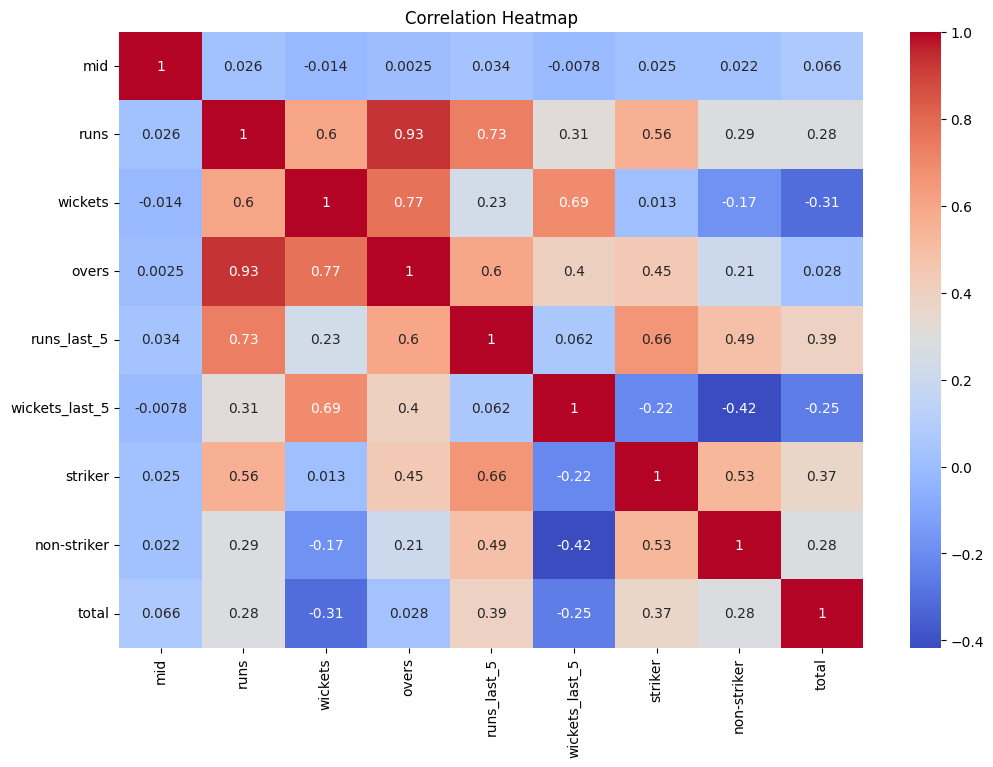

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Insight:**
Correlations help us identify relationships between variables such as runs, wickets, and total score.

## Top 10 Batters by Runs

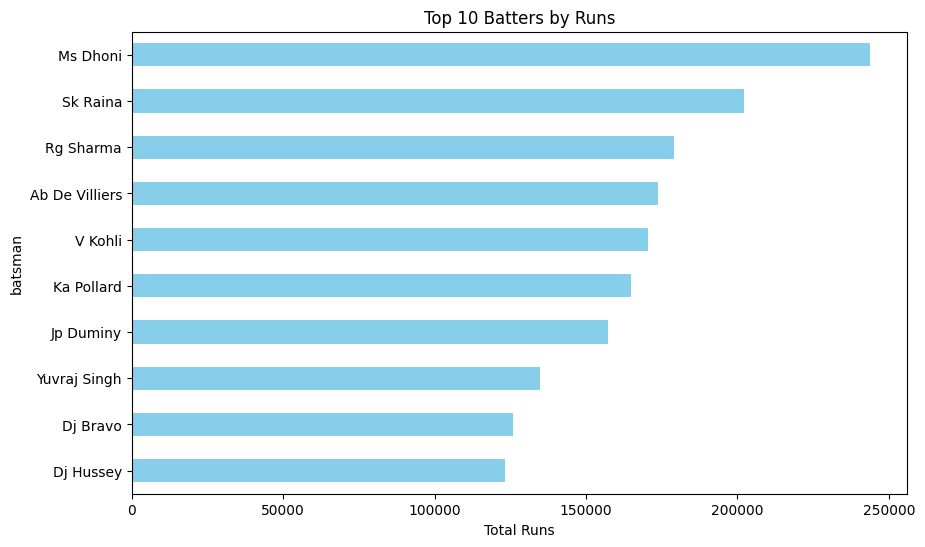

In [7]:
top_batters = df.groupby('batsman')['runs'].sum().sort_values(ascending=False).head(10)
top_batters.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Total Runs')
plt.title('Top 10 Batters by Runs')
plt.gca().invert_yaxis()
plt.show()

## Top 10 Bowlers by Wickets

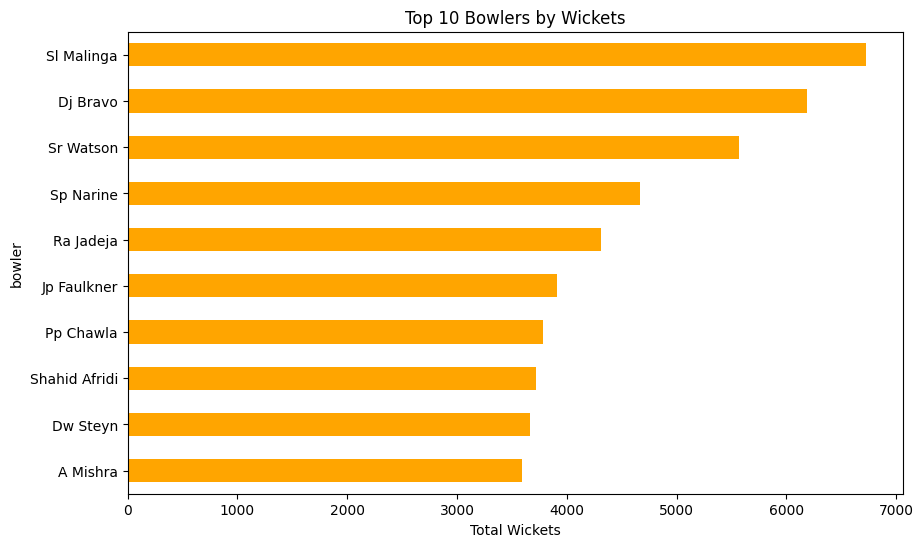

In [8]:
top_bowlers = df.groupby('bowler')['wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind='barh', figsize=(10,6), color='orange')
plt.xlabel('Total Wickets')
plt.title('Top 10 Bowlers by Wickets')
plt.gca().invert_yaxis()
plt.show()

## Scatter Plot: Strike Rate vs Total Runs

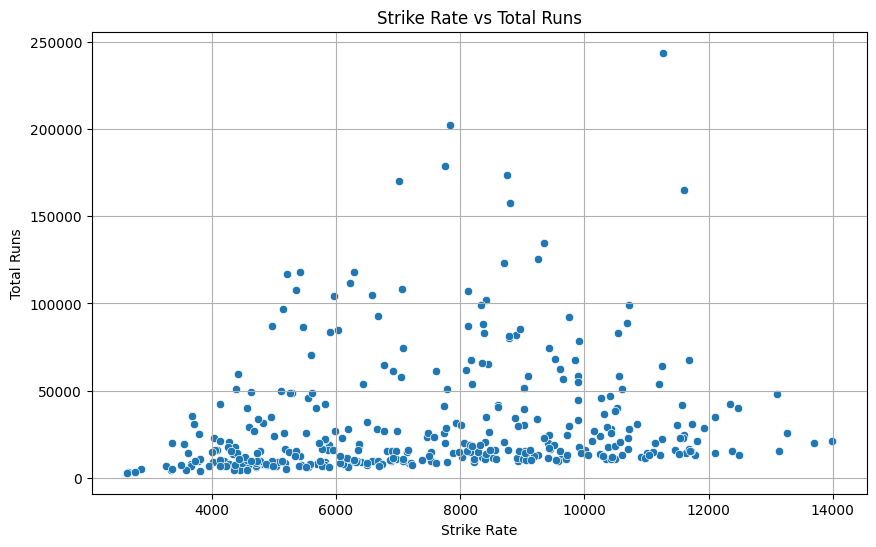

In [10]:
# Estimate strike rate using available data
bat_summary = df.groupby('batsman').agg({
    'runs': 'sum',
    'mid': 'count'   # Count of entries per batsman as proxy for balls faced
}).rename(columns={'mid': 'balls_faced'}).reset_index()

# Calculate strike rate
bat_summary['strike_rate'] = (bat_summary['runs'] / bat_summary['balls_faced']) * 100

# Filter for significant contributors
bat_summary = bat_summary[bat_summary['balls_faced'] >= 100]

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=bat_summary, x='strike_rate', y='runs')
plt.title("Strike Rate vs Total Runs")
plt.xlabel("Strike Rate")
plt.ylabel("Total Runs")
plt.grid(True)
plt.show()


**Insight:**
This plot helps identify high-impact aggressive batters who combine consistency with acceleration.